<a href="https://colab.research.google.com/github/ZinebIHROUCHEN/Task-1-Predict-the-percentage-of-an-student-based-on-the-no.-of-study-hours/blob/main/Task-1-Predict-the-percentage-of-an-student-based-on-the-no.-of-study-hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1 - Prediction using Supervised ML**

> To Predict the percentage of marks of the students based on the number of hours they studied



**AUTHOR - Zineb IHROUCHEN**

In [ ]:
# importing the required libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading data
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [ ]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Check if they are null value 
data.isnull == True

False

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**No null value, we can visualize the data** 





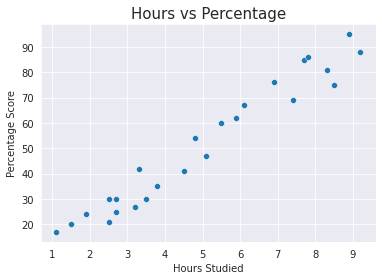

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'], x=data['Hours'])
plt.title('Hours vs Percentage',size = 15)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

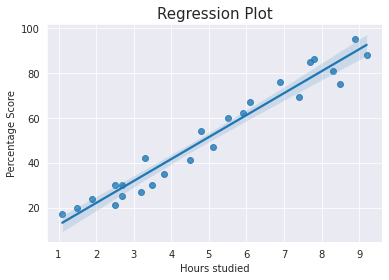

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(y=data['Scores'],x=data['Hours'])
plt.title('Regression Plot', size='15')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()
print(data.corr())


It is confirmed that the variables are positively correlated.



 **Training the Model**












**1.   Splitting the Data**


In [ ]:
# Defining x and y from the Data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


In [ ]:
from sklearn.model_selection import train_test_split
# Spliting the Data in two
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

**2. Fitting the Data into the model**

In [ ]:
from sklearn.linear_model import LinearRegression 
Reg = LinearRegression()
Reg.fit(X_train,y_train)
print("Training complete.")

Training complete.


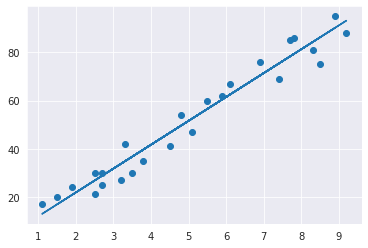

In [ ]:
line = Reg.coef_*x +Reg.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

**Predicting the Percentage of Marks**



In [ ]:
print(X_test)
y_pred = Reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing the Predicted Marks with the Actual Marks**

In [ ]:
df = pd.DataFrame( {'Actual' : y_test , 'Predict' : y_pred} )
df

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
own_pred = Reg.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


**Evaluating the Mode**

In [1]:
# Calculating the accuracy of the model
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

NameError: ignored